## Binary classification with one hidden layer(Neural Network)

### Data description and analysis is carried out in heart_exploratory_data_analysis.ipynb

#### Importing necessary libraries to import the data and processing the data.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Loading dataset from csv file into numpy array. 

In [2]:
data = np.genfromtxt('heart.csv',delimiter=',')
data

array([[nan, nan, nan, ..., nan, nan, nan],
       [63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

#### Slicing the data and storing the input variables in X and target variable in Y, in the form of matrix 

In [3]:
X=np.array((data[1:,:-1]))
Y=np.array((data[1:,-1]))
print('type of X:',type(X))
print('type of Y:',type(Y))

type of X: <class 'numpy.ndarray'>
type of Y: <class 'numpy.ndarray'>


#### Make sure the slicing and dimensions(rows, columns) are correct, and training set size 

In [4]:
print('number of training examples:',X.shape[0])
print('Shape of input variables(X-matrix/numpy array):',X.shape)
print('Shape of target variable(Y-vector/numpy array):',Y.shape)

number of training examples: 303
Shape of input variables(X-matrix/numpy array): (303, 13)
Shape of target variable(Y-vector/numpy array): (303,)


#### To avoid further errors, converting dimensions of Y vector to one-column matrix

In [5]:
Y = np.reshape(Y,(Y.shape[0],1))
Y.shape

(303, 1)

#### Splitting the data into train and test data where 20% of the data is the test data. Using shape, to confirm the split.

In [6]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.2,random_state=0)
print("Shape of X(train_set):",train_X.shape)
print("Shape of X(test_set):",test_X.shape)
print("Shape of Y(train_set):",train_Y.shape)
print("Shape of Y(test_set):",test_Y.shape)

Shape of X(train_set): (242, 13)
Shape of X(test_set): (61, 13)
Shape of Y(train_set): (242, 1)
Shape of Y(test_set): (61, 1)


#### Transpose of the data for easy calculations further

In [7]:
train_X=train_X.T
test_X=test_X.T
train_Y=train_Y.T
test_Y=test_Y.T
print("Shape of X(train_set):",train_X.shape)
print("Shape of X(test_set):",test_X.shape)
print("Shape of Y(train_set):",train_Y.shape)
print("Shape of Y(test_set):",test_Y.shape)

Shape of X(train_set): (13, 242)
Shape of X(test_set): (13, 61)
Shape of Y(train_set): (1, 242)
Shape of Y(test_set): (1, 61)


### Neural Network model with single hidden layer. 
#### General Methodology:
1. Define the neural network structure(#input_units, #hidden_units, #output_units)
2. Initialize the model's parameters
3. Loop:
    1. Implement forward propagation
    2. Compute loss
    3. Implement backward propagation to get the gradients
    4. Update parameters (gradient descent)
4. Merge 1,2,3 steps into one function

#### 1. Define the neural network structure(input)
- Arguments:
    - X -- input dataset of shape (input size, number of examples)
    - Y -- labels of shape (output size, number of examples)  
- Returns:
    - n_x -- the size of the input layer
    - n_h -- the size of the hidden layer (=4)
    - n_y -- the size of the output layer

In [8]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] #size of input layer
    n_h = 4
    n_y = Y.shape[0] #size of output layer
    
    return (n_x, n_h, n_y)

#### 2. Initialize the model's parameters
- Argument:
    - n_x -- size of the input layer
    - n_h -- size of the hidden layer
    - n_y -- size of the output layer
- Returns: params -- python dictionary containing your parameters:
    - W1 -- weight matrix of shape (n_h, n_x)
    - b1 -- bias vector of shape (n_h, 1)
    - W2 -- weight matrix of shape (n_y, n_h)
    - b2 -- bias vector of shape (n_y, 1)
- Initializing weights matrices with random values
- Initializing vias vectors with zeros

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 3. Loop:
#### 3.A. Implement forward propagation
- Argument:
    - X -- input data of size (n_x, m)
    - parameters -- python dictionary containing your parameters (output of initialization function)
- Returns:
    - A2 -- The sigmoid output of the second activation
    - cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"

In [10]:
def forward_propagation(X, parameters):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

#Sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

#### 3.B. Compute cost

- Computes the cross-entropy cost
- Arguments:
    - A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    - Y -- "true" labels vector of shape (1, number of examples)
    - parameters -- python dictionary containing your parameters W1, b1, W2 and b2
- Returns:
    - cost -- cross-entropy cost given equation (13)

In [11]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

#### 3.C. Implement backward propagation to get the gradients
- Arguments:
    - parameters -- python dictionary containing our parameters 
    - cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    - X -- input data of shape (2, number of examples)
    - Y -- "true" labels vector of shape (1, number of examples)
- Returns:
    - grads -- python dictionary containing your gradients with respect to different parameters

In [12]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

#### Update Parameters(Gradient Descent)
- Arguments:
    - parameters -- python dictionary containing your parameters 
    - grads -- python dictionary containing your gradients 
- Returns:
    - parameters -- python dictionary containing your updated parameters 

In [13]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-(learning_rate*dW1)
    b1 = b1-(learning_rate*db1)
    W2 = W2-(learning_rate*dW2)
    b2 = b2-(learning_rate*db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 4. Merge steps 1,2,3 into one functions 
- Arguments:
    - X -- dataset of shape (13, number of examples)
    - Y -- labels of shape (1, number of examples)
    - n_h -- size of the hidden layer
    - num_iterations -- Number of iterations in gradient descent loop
    - print_cost -- if True, print the cost every 1000 iterations
- Returns:
    - parameters -- parameters learnt by the model. They can then be used to predict.


In [14]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0] #1
    n_y = layer_sizes(X, Y)[2] #1
    
    # Initialize parameters #2
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent) #3
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache". #3.A
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost". #3.B
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads". #3.C
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters". #3.D
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

#### Predicting the target 
- Using the learned parameters, predicts a class for each example in X
- Arguments:
    - parameters -- python dictionary containing your parameters 
    - X -- input data of size (n_x, m)
- Returns
    - predictions -- vector of predictions of our model (red: 0 / blue: 1)

In [15]:
def predict(parameters, X):
    
    # Computes probabilities using forward propagation, and 
    # classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

#### Training the model with X and Y train data sets using nn_model function.

In [16]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(train_X, train_Y, n_h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 167.835480
Cost after iteration 1000: 166.914228
Cost after iteration 2000: 166.914228
Cost after iteration 3000: 166.914228
Cost after iteration 4000: 166.914228
Cost after iteration 5000: 166.914228
Cost after iteration 6000: 166.914228
Cost after iteration 7000: 166.914228
Cost after iteration 8000: 166.914228
Cost after iteration 9000: 166.914228


#### Using the above obtained parameters to predict the test set and accuracy is calculated based on train and test set of Y

In [17]:
predictions = predict(parameters, test_X)
print ('Accuracy:%f' %float((np.dot(test_Y,predictions.T) + np.dot(1-test_Y,1-predictions.T))/float(test_Y.size)*100) + '%')

Accuracy:55.737705%


#### Tuning the hidden layer units

Accuracy for 1 hidden units: 55.73770491803278 %
Accuracy for 2 hidden units: 55.73770491803278 %
Accuracy for 3 hidden units: 55.73770491803278 %
Accuracy for 4 hidden units: 55.73770491803278 %
Accuracy for 5 hidden units: 55.73770491803278 %
Accuracy for 6 hidden units: 44.26229508196721 %
Accuracy for 7 hidden units: 44.26229508196721 %
Accuracy for 8 hidden units: 44.26229508196721 %
Accuracy for 9 hidden units: 44.26229508196721 %
Accuracy for 10 hidden units: 44.26229508196721 %
Accuracy for 20 hidden units: 44.26229508196721 %
Accuracy for 30 hidden units: 44.26229508196721 %
Accuracy for 40 hidden units: 44.26229508196721 %
Accuracy for 50 hidden units: 55.73770491803278 %


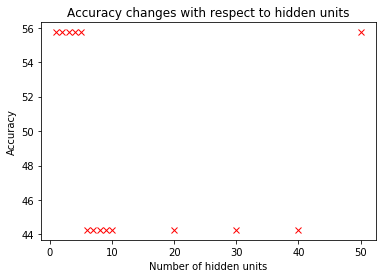

In [18]:
hidden_layer_units = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
for i, n_h in enumerate(hidden_layer_units):
    parameters = nn_model(train_X, train_Y, n_h, num_iterations = 5000)
    predictions = predict(parameters, test_X)
    accuracy = float((np.dot(test_Y,predictions.T) + np.dot(1-test_Y,1-predictions.T))/float(test_Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    plt.plot([n_h],[accuracy],'rx')
    plt.xlabel('Number of hidden units')
    plt.ylabel('Accuracy')
    plt.title('Accuracy changes with respect to hidden units')

#### From the above chart we can infer that only high variation in the number of hidden units results in change in accuracy. Very high number of hidden units also results in overfitting.